## 물고기 분류 문제

* x축과 y축의 스케일이 맞지 않아 분류를 정확하게 하지 못함!
* 전처리를 진행해보자

### 데이터 준비

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

fish_data=np.column_stack((fish_length, fish_weight)) #가로 두개!!!!!!
print(fish_data)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [3]:
fish_target=np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### 데이터셋 분리
* sklearn의 train_test_split 함수 사용
* stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눔 (훈련데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 특히 유용)

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target=train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

### k-nearest-neighbor

In [7]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)


1.0

In [8]:
print(kn.predict([[25, 150]])) # [25, 150]은 도미(1)인데 빙어(0)으로 예측했다???? 왜지???

[0.]


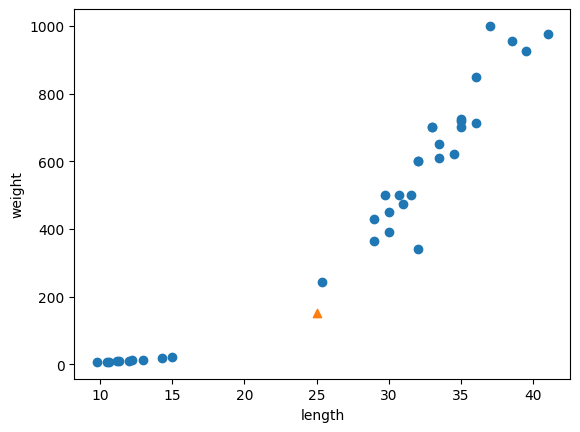

In [10]:
#그려보자
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [14]:
# knn은 이웃과의 거리를 통해 분류하는데 이웃 개수의 기본값은 5
distances, indexes=kn.kneighbors([[25, 150]])
print(indexes)

[[21 33 19 30  1]]


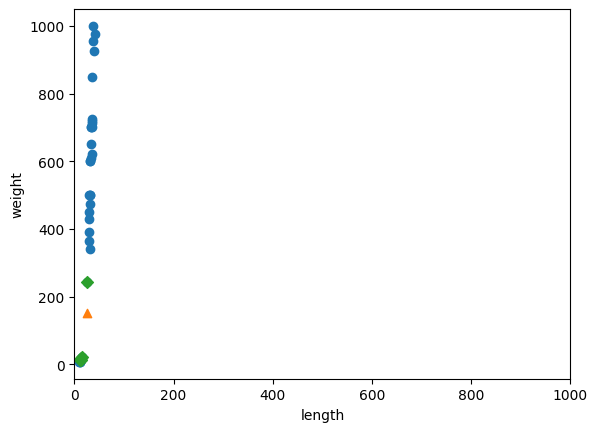

In [13]:
# x축도 0~1000으로 맞춰서 그리자
# [25, 150] 의 이웃을 다른 색으로 표시하자

plt.scatter(train_input[:, 0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 문제발생 -> 전처리 진행(z-score)
* x축의 범위가 y축에 비해 너무나도 작다. 이때문에 거리가 빙어에 가깝게 나온것

In [15]:
mean=np.mean(train_input, axis=0) #axis=0은 열!!!!!!!
std=np.std(train_input, axis=0)

train_scaled=(train_input-mean)/std

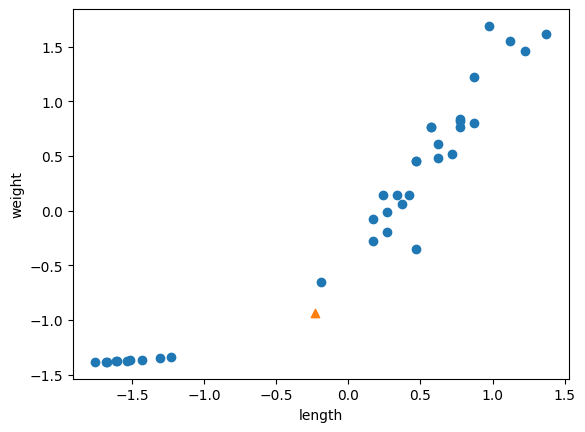

In [18]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
new=([25, 150]-mean)/std
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
kn.fit(train_scaled, train_target)

test_scaled=(test_input-mean)/std
kn.score(test_scaled, test_target)

1.0

In [22]:
kn.predict([new])

array([1.])

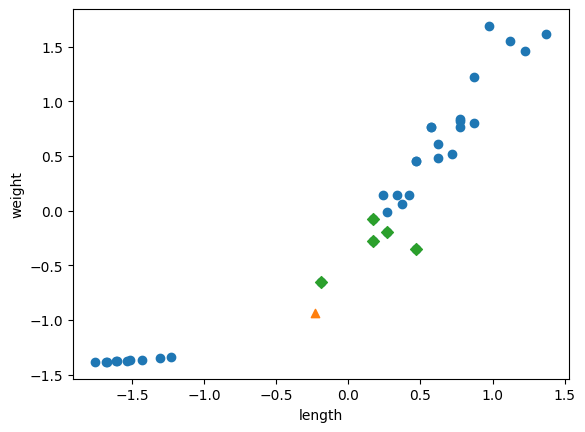

In [23]:
distances, indexes=kn.kneighbors([new])

plt.scatter(train_scaled[:, 0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 정리
* x축의 스케일은 0 ~ 50 정도였고 y축의 스케일은 0 ~ 1000이여서 예측할때 잘 되지 않음
* 스케일 전처리를 통해 x축과 y축의 스케일을 동일하게 맞춰보자! -> z-score(표준편차)를 사용
* kneighbors()를 사용하여 예측하려는 샘플의 이웃인 distances와 indexes 구할 수 있음
